In [252]:
# data received from https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/

In [253]:
import pandas as pd

# %%timeit

In [254]:
# reading and reducing dataset

path = '../data/2019-20_pbp.csv'

df = pd.read_csv(path)

outcome = df[df['AwayPlay']=='End of Game']

outcome = outcome[outcome['GameType']=='regular']

col_wanted=['GameType','Date', 'WinningTeam', 'AwayTeam', 'AwayScore', 'HomeTeam', 'HomeScore']

outcome = outcome[col_wanted]

outcome.to_csv(path[0:-8] + '_outcome.csv')

outcome.reset_index(drop=True, inplace=True)

outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GameType     1060 non-null   object
 1   Date         1060 non-null   object
 2   WinningTeam  1060 non-null   object
 3   AwayTeam     1060 non-null   object
 4   AwayScore    1060 non-null   int64 
 5   HomeTeam     1060 non-null   object
 6   HomeScore    1060 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 58.1+ KB


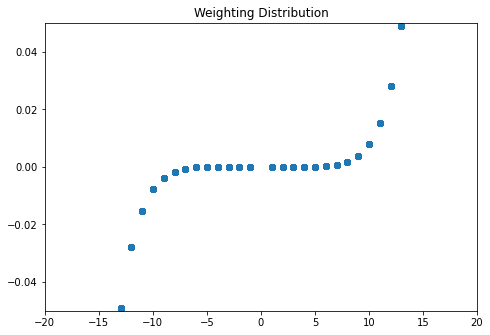

In [255]:
import matplotlib.pyplot as plt
import numpy as np

weight=0.05
scale=7

samples=len(outcome)

blow_out=15

away_score=[i for i in outcome['AwayScore'][0:samples]]
home_score=[i for i in outcome['HomeScore'][0:samples]]
# difference=[i-home_score for i in away_score]
difference=[away_score[i]-home_score[i] for i in range(len(away_score))]
for i in range(len(difference)):
    if difference[i]>blow_out:
        difference[i]= blow_out
    elif difference[i] < (-blow_out):
        difference[i] = -blow_out
weighted=[weight*i for i in difference]
scaled=[i**scale for i in weighted]


fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
a1.plot(difference, scaled, 'o')
a1.set_title('Weighting Distribution')
a1.set_ylim(-0.05,0.05)
a1.set_xlim(-20,20)
# a1.set_xlim(85,115)
plt.show()

In [256]:
outcome['Weighted_Result']=scaled

In [257]:
def unique(list1):
 
    # initialize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [258]:
teams=unique(outcome['HomeTeam'])

team_results=[]
for i in range(len(teams)):#len(teams)):
    team_total=0
    for j in range(len(outcome)):
        if outcome['AwayTeam'][j]==teams[i]: 
            team_total+=outcome['Weighted_Result'][j]
        elif outcome['HomeTeam'][j]==teams[i]:
            team_total-=outcome['Weighted_Result'][j]
    #print(teams[i] + ':  ' + str(team_total))
    team_results.append(team_total)

In [259]:
 # initialise data of lists.
data = {'Team':teams, 'Weighted_Result':team_results}
 
# Create DataFrame
df = pd.DataFrame(data)
 
df.sort_values(by=['Weighted_Result'], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)

print(df)

df.to_csv(path[0:-8] + '_weighted_results.csv')

   Team  Weighted_Result
0   MIL         3.435210
1   LAC         2.721261
2   BOS         2.137898
3   DAL         1.814019
4   TOR         1.758531
5   LAL         1.475203
6   MIA         1.013616
7   HOU         0.774089
8   OKC         0.725561
9   UTA         0.577776
10  PHI         0.392138
11  IND         0.309227
12  DEN         0.220920
13  NOP         0.025390
14  POR        -0.091293
15  BRK        -0.095671
16  PHO        -0.102814
17  SAS        -0.157843
18  MEM        -0.269012
19  ORL        -0.483883
20  CHI        -0.719815
21  MIN        -0.733469
22  SAC        -0.783364
23  DET        -1.094676
24  WAS        -1.465380
25  NYK        -1.845437
26  ATL        -2.142691
27  CLE        -2.417635
28  GSW        -2.441760
29  CHO        -2.536093
